### Ćwiczenie 1

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def read_csv_file_data(csv_file):
    args = []
    values = []

    with open(csv_file, newline='') as file:
        reader = csv.reader(file, delimiter=',')

        for row in reader:
            _x, _y = row
            args.append(int(float(_x)))
            values.append(float(_y))

    return np.array(args), np.array(values)


CSV_FILE_NAME = './testfile.csv'
csv_X, csv_y = read_csv_file_data(CSV_FILE_NAME)
print(csv_X.shape)
print(csv_y.shape)

(6000,)
(6000,)


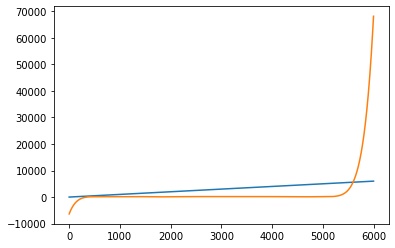

In [2]:
plt.figure()
plt.plot(csv_X)
plt.plot(csv_y)

In [3]:
del CSV_FILE_NAME

#### numpy.polyfit

In [4]:
poly_order = 11
poly_1 = np.polyfit(csv_X, csv_y, poly_order)
print(poly_1)

[ 1.76099755e-33 -5.48063044e-29  7.46004332e-25 -5.83266537e-21
  2.89313082e-17 -9.49227270e-14  2.08484019e-10 -3.03690401e-07
  2.84725837e-04 -1.62252029e-01  5.03889332e+01 -6.34805310e+03]


In [5]:
def predict_using_polynomial(poly_fit, x):
    _y = 0

    for i in range(0, len(poly_fit) - 1):
        _exp = len(poly_fit) - i - 1
        _coeff = poly_fit[i]
        _y += _coeff * (x ** _exp)

    _y += poly_fit[len(poly_fit) - 1]
    return _y


for i in range(5500, 5515):
    _pred = predict_using_polynomial(poly_1, i)
    print( _pred, csv_y[i] )

2664.886236828812 2664.886236225717
2686.6919365819795 2686.691936527841
2708.6536050273007 2708.6536045423672
2730.772156225228 2730.7721577039883
2753.0485084739066 2753.0485077253506
2775.4835866743833 2775.483585392587
2798.0783145644837 2798.0783138624356
2820.8336247251154 2820.833625828378
2843.7504569799075 2843.750457798593
2866.8297482849466 2866.8297481886075
2890.072443210056 2890.0724449506924
2913.479494392932 2913.479496037118
2937.0518517685723 2937.051851307504
2960.790475902266 2960.790475880258
2984.6963297293423 2984.6963291517422


In [6]:
del poly_1
del _pred

#### sklearn.pipeline.Pipeline

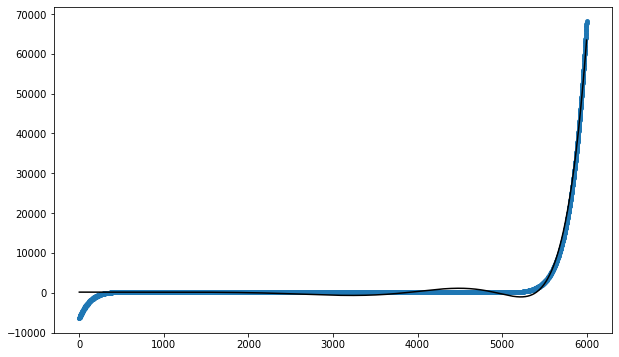

In [7]:
import sklearn.preprocessing as skp
import sklearn.linear_model as skl
import sklearn.pipeline as skpl

poly_transform = [
    ('polynomial', skp.PolynomialFeatures(degree=poly_order)),
    ('modal', skl.LinearRegression())
]

csv_Xr = csv_X.reshape(-1, 1)
pipe = skpl.Pipeline(poly_transform)
pipe.fit(csv_Xr, csv_y)

poly_pred = pipe.predict(csv_Xr)
sorted_zip = sorted(zip(csv_X, poly_pred))
X_poly, poly_pred = zip(*sorted_zip)
plt.figure(figsize=(10,6))
plt.scatter(csv_X, csv_y, s=15)
plt.plot(X_poly, poly_pred, color='k')
plt.show()

In [8]:
del pipe
del sorted_zip
del X_poly
del poly_pred
del csv_Xr
del poly_order

#### sklearn.linear_model.LinearRegression

In [9]:
import sklearn.model_selection as sks
import sklearn.preprocessing as skp

poly_order = 19
X_train, X_test, y_train, y_test = sks.train_test_split(csv_X, csv_y, test_size=0.6)
poly_reg = skp.PolynomialFeatures(degree=poly_order)
csv_X_r = csv_X.reshape(-1, 1)
X_ = poly_reg.fit_transform(csv_X_r)
X_test_ = poly_reg.fit_transform(X_test.reshape(-1, 1))
lin_reg = skl.LinearRegression(normalize=True)
lin_reg.fit(X_, csv_y)

print(lin_reg.coef_)
print(lin_reg.intercept_)
print()
print(lin_reg.predict(X_test_)[0:4])

[ 0.00000000e+00  5.03889332e+01 -1.62252029e-01  2.84725835e-04
 -3.03690395e-07  2.08484007e-10 -9.49227104e-14  2.89312909e-17
 -5.83265202e-21  7.45996499e-25 -5.48027682e-29  1.75976080e-33
  3.35661501e-40 -7.04228887e-44  1.13016056e-47 -1.36051377e-51
  1.18830995e-55 -7.10621124e-60  2.60125221e-64 -4.39386992e-69]
-6348.053104420036

[129.63028288 142.40985022 115.14199669  95.18805366]


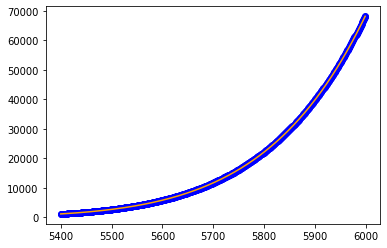

In [10]:
def visualize_polynomial_regression(data_x, data_y, reg_lin, reg_poly):
    plt.scatter(data_x, data_y, color='b')
    _pred_reg = reg_poly.fit_transform(data_x)
    plt.plot(data_x, reg_lin.predict( _pred_reg ), color='orange')
    plt.show()


l = 5400
r = 6000
visualize_polynomial_regression(csv_X_r[l:r], csv_y[l:r], lin_reg, poly_reg)

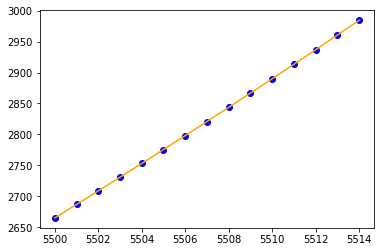

In [11]:
l = 5500
r = l + 15
visualize_polynomial_regression(csv_X_r[l:r], csv_y[l:r], lin_reg, poly_reg)


In [12]:
def predict_and_print(a, b, lr, pr):
    for _i in range(a, b):
        _p = [[_i]]
        _pred = lr.predict(pr.fit_transform( _p ))
        print(_pred, csv_y[_i])


predict_and_print(l, r, lin_reg, poly_reg)

[2664.88623534] 2664.886236225717
[2686.69193355] 2686.691936527841
[2708.65360125] 2708.6536045423672
[2730.77215145] 2730.7721577039883
[2753.04850553] 2753.0485077253506
[2775.48357989] 2775.483585392587
[2798.07831083] 2798.0783138624356
[2820.83362393] 2820.833625828378
[2843.75045323] 2843.750457798593
[2866.82974496] 2866.8297481886075
[2890.07244046] 2890.0724449506924
[2913.47948758] 2913.479496037118
[2937.0518464] 2937.051851307504
[2960.79047213] 2960.790475880258
[2984.69632649] 2984.6963291517422


In [13]:
del X_train
del X_test
del X_test_
del y_train
del y_test
del X_
del l
del r
del poly_order
del lin_reg
del poly_reg
del poly_transform

#### linear_regression()

In [14]:
import pandas as pd


def linear_regression(x, y):
    xt = x.T
    _tmp = xt.dot(x)
    _tmp = np.linalg.inv(_tmp)
    _tmp = _tmp.dot(xt)
    _theta = _tmp.dot(y)
    return _theta


training_data = pd.DataFrame(
    data=[ [1,1], [2,2], [4,4] ],
    columns=['x1', 'y']
)
training_data.insert(0, 'x0', np.ones(3))
X_lr = training_data[['x0', 'x1']]
y_lr = training_data[['y']]
theta = linear_regression(X_lr, y_lr)
print(theta)

[[0.]
 [1.]]


In [15]:
def build_df(x, y):
    _df = []

    for _i in range(0, len(x)):
        _df.append( [x[_i], y[_i]] )

    return pd.DataFrame(data=_df, columns=['x1', 'y'])


df = build_df(csv_X, csv_y)
df.insert(0, 'x0', np.ones(df.shape[0]))
X_lr = df[['x0', 'x1']]
y_lr = df[['y']]
theta = linear_regression(X_lr, y_lr)
print(theta)

[[-3.81864193e+03]
 [ 1.90998666e+00]]


In [16]:
theta = linear_regression(csv_X_r, csv_y)
print(theta)

[0.95524661]


In [17]:
poly_order = 19
poly_reg = skp.PolynomialFeatures(degree=poly_order)
X_ = poly_reg.fit_transform(csv_X_r)
theta = linear_regression(X_, csv_y)
print(theta)

[-3.31975162e+06  5.37190918e+03 -4.54664612e+00  2.08137830e-03
 -2.38291810e-07 -2.99336619e-10  1.90502424e-13 -4.25515713e-17
 -2.73650787e-21  3.20105079e-24 -3.96724873e-28 -5.99675909e-32
  1.01555701e-35  2.35515174e-39 -3.09098355e-43 -9.99215840e-47
  2.28803973e-50 -1.19257585e-54 -5.85044617e-59  5.48822500e-63]


In [18]:
def predict_linear_regression(ft, th):
    return ft.dot(th.T)


for i in range(5500, 5515):
    ft_1 = poly_reg.fit_transform([[i]])
    pred_1 = predict_linear_regression(ft_1, theta)
    print(pred_1 + 28_800, csv_y[i])


[2535.33912218] 2664.886236225717
[2566.75735152] 2686.691936527841
[2598.3283211] 2708.6536045423672
[2630.05285442] 2730.7721577039883
[2661.93179739] 2753.0485077253506
[2693.96597469] 2775.483585392587
[2726.15624094] 2798.0783138624356
[2758.50344026] 2820.833625828378
[2791.00840521] 2843.750457798593
[2823.67200911] 2866.8297481886075
[2856.49509966] 2890.0724449506924
[2889.47852361] 2913.479496037118
[2922.62315452] 2937.051851307504
[2955.92984831] 2960.790475880258
[2989.3994801] 2984.6963291517422


In [19]:
del df
del theta
del X_lr
del y_lr
del training_data
del X_
del ft_1
del poly_reg
del poly_order
del pred_1
del csv_X_r
del csv_X
del csv_y

### Ćwiczenie 2

In [93]:
import csv
import numpy as np
import pandas as pd


def read_csv_file_data_2(csv_file):
    lines = []

    with open(csv_file, newline='') as file:
        reader = csv.reader(file, delimiter=',')
        header = next(reader)

        for row in reader:
            lines.append(row)

    return pd.DataFrame(data=lines, columns=header)


CSV_FILE_NAME = './../../data/GoesGold/ElectionData.csv'
csv_ed = read_csv_file_data_2(CSV_FILE_NAME)
print(csv_ed.shape)

(21643, 28)


In [96]:
def reshape_election_data(ed):
    _tmp = ed[ed['territoryName'] == 'Território Nacional']
    _tmp = ed[['TimeElapsed', 'Party', 'Percentage', 'Votes', 'Mandates']]
    _tmp.loc[:, 'TimeElapsed'] = pd.to_numeric(_tmp['TimeElapsed'])
    _tmp.loc[:, 'Percentage'] = pd.to_numeric(_tmp['Percentage'])
    _tmp.loc[:, 'Votes'] = pd.to_numeric(_tmp['Votes'])
    return _tmp


ed_n = reshape_election_data(csv_ed)
print(ed_n.dtypes)

TimeElapsed      int64
Party           object
Percentage     float64
Votes            int64
Mandates        object
dtype: object


/media/isshin/2b550c8a-059f-4ca5-8b78-7211cfc683fc/isshin/Projekty/PUM/PUM_PC/venv/lib/python3.7/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/media/isshin/2b550c8a-059f-4ca5-8b78-7211cfc683fc/isshin/Projekty/PUM/PUM_PC/venv/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [97]:
def filter_through_parties(_ed_n):
    _parties = tuple(set(_ed_n['Party']))
    _ed_p_set = []

    for party in _parties:
        _tmp = _ed_n[_ed_n['Party'] == party]
        _tmp = _tmp[['TimeElapsed', 'Votes']]
        _ed_p_set.append(_tmp)

    return _ed_p_set, _parties


ed_p, parties = filter_through_parties(ed_n)


In [98]:
del CSV_FILE_NAME
del csv_ed
del ed_n

#### regresja liniowa

In [100]:
import sklearn.linear_model as skl


def build_data_by_fit_and_predict(_ed_p, _x_test):
    _predictions = []

    for _i in range(0, len(_ed_p)):
        _dt = _ed_p[_i]
        _dt_X_r = np.array(_dt['TimeElapsed']).reshape(-1, 1)
        _dt_y = np.array(_dt['Votes'])
        _lr = skl.LinearRegression()
        _lr.fit(_dt_X_r, _dt_y)
        _predict = _lr.predict(_x_test)
        _predictions.append(_predict)

    return _predictions


X_test = [[j] for j in range(0, 265)]
predictions = build_data_by_fit_and_predict(ed_p, X_test)

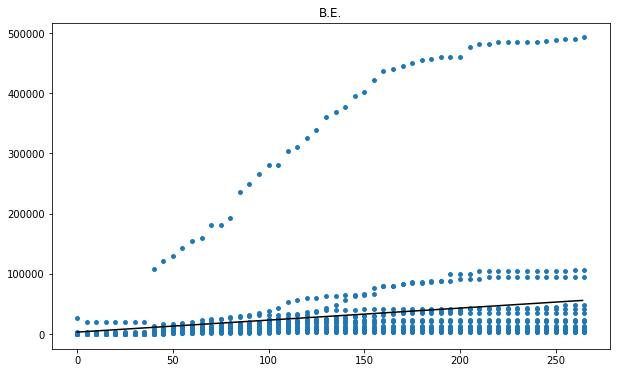

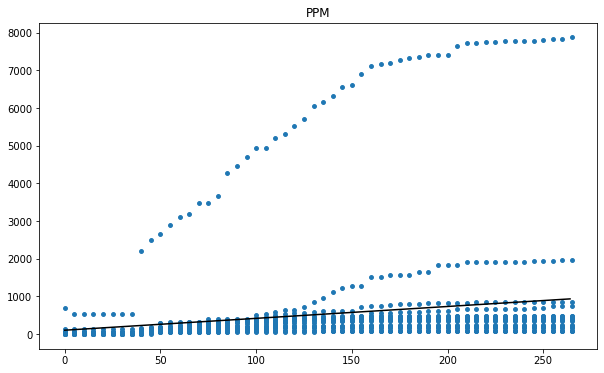

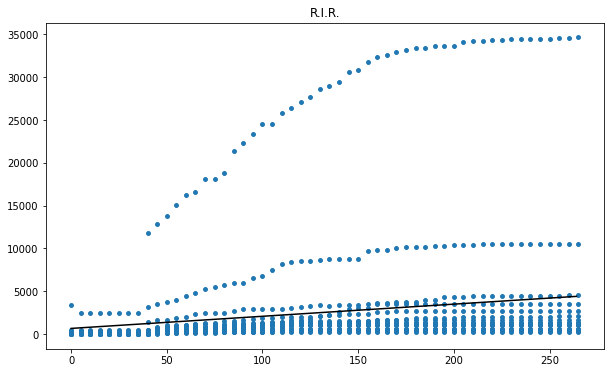

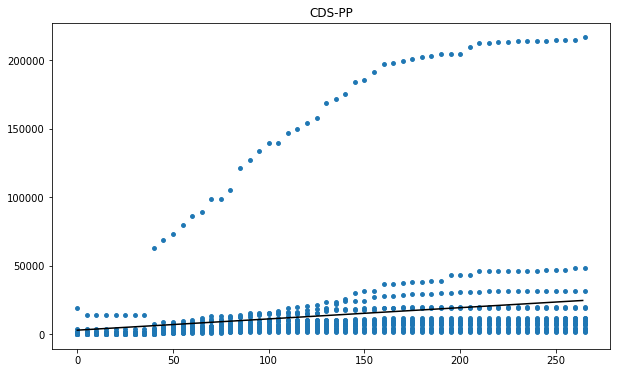

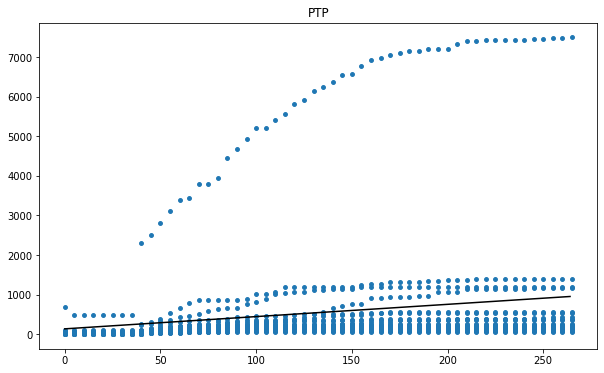

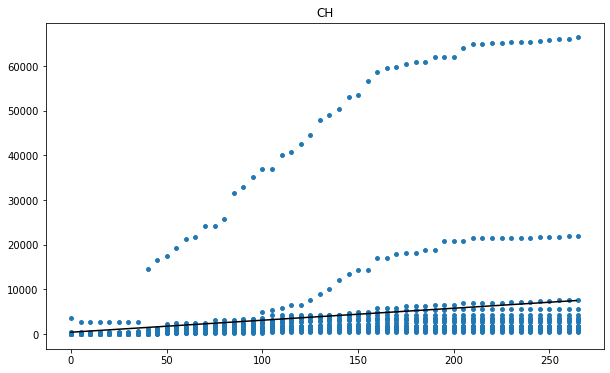

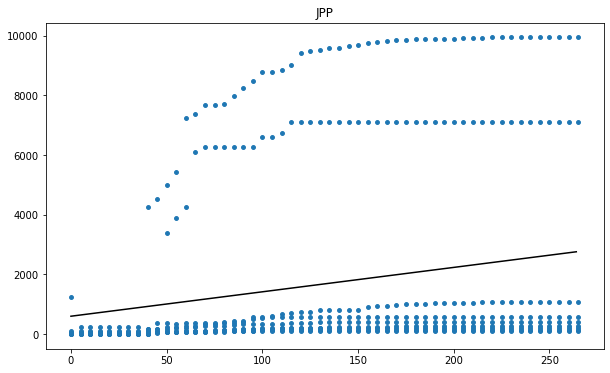

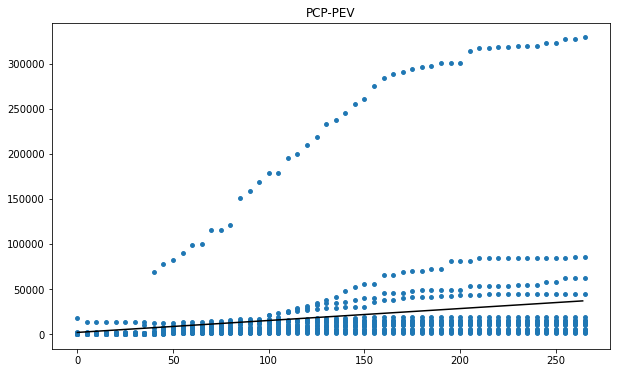

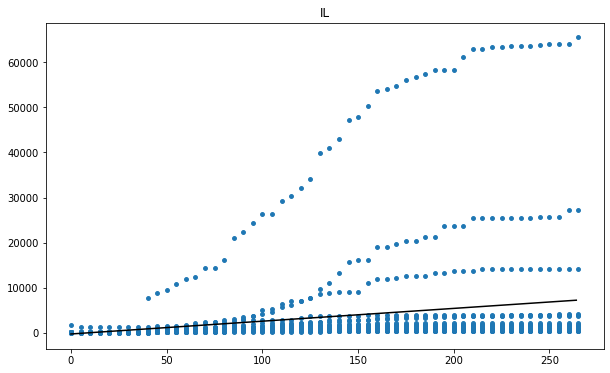

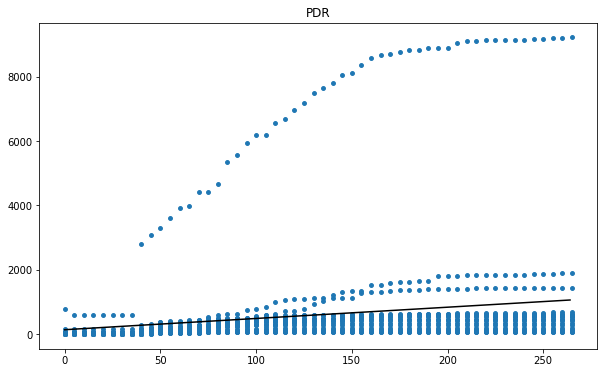

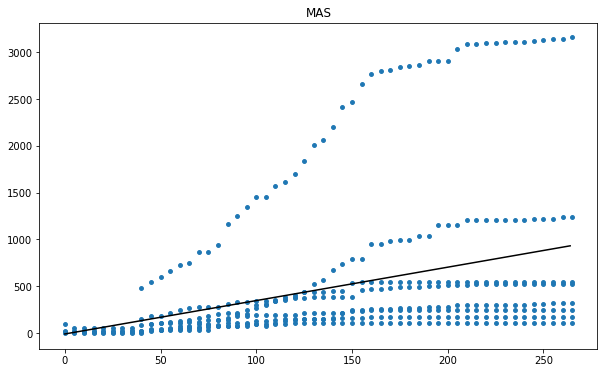

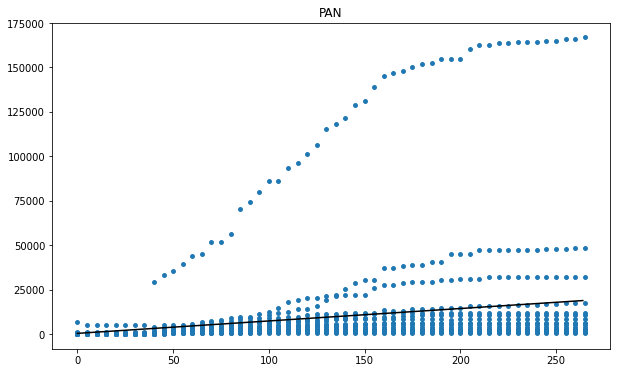

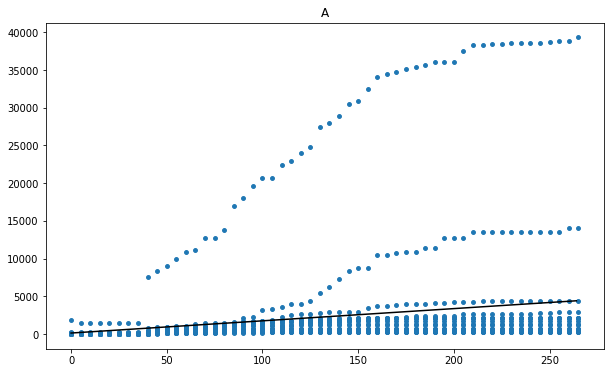

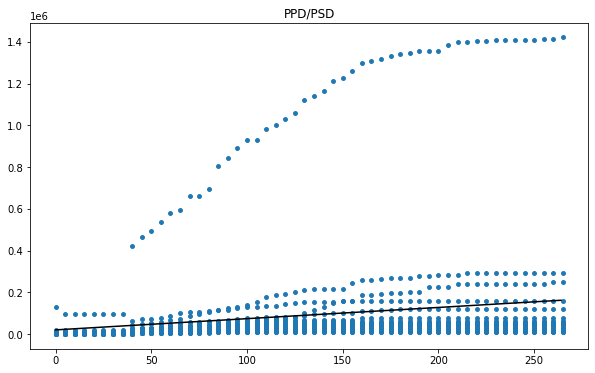

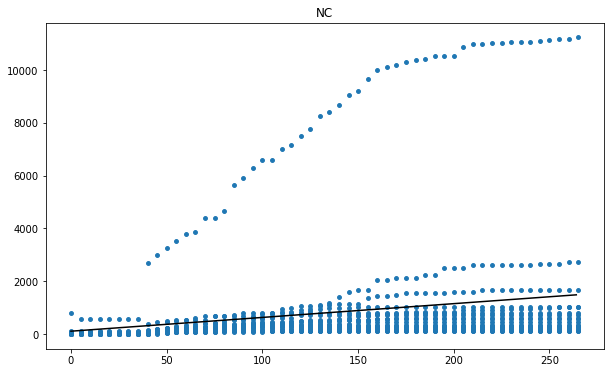

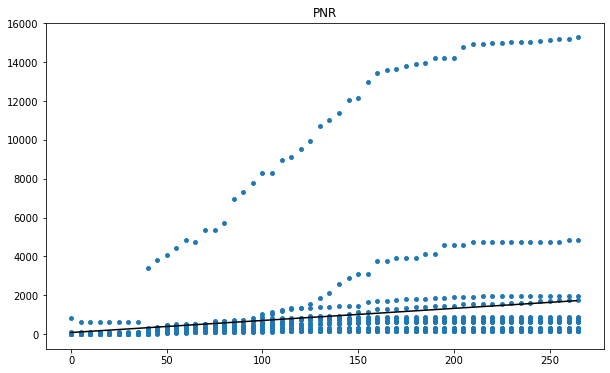

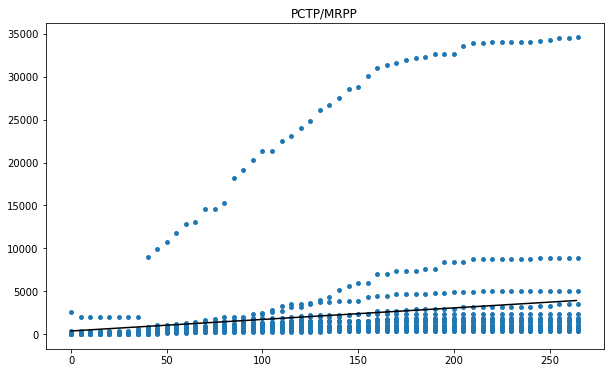

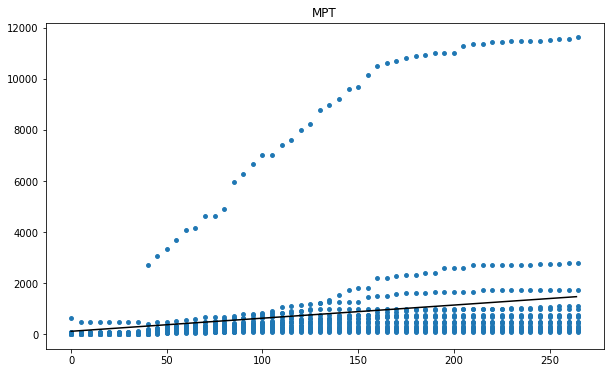

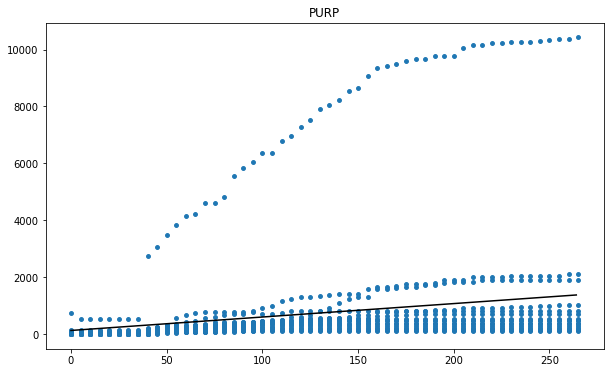

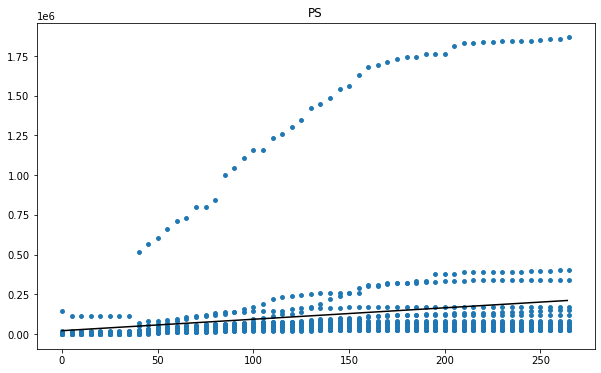

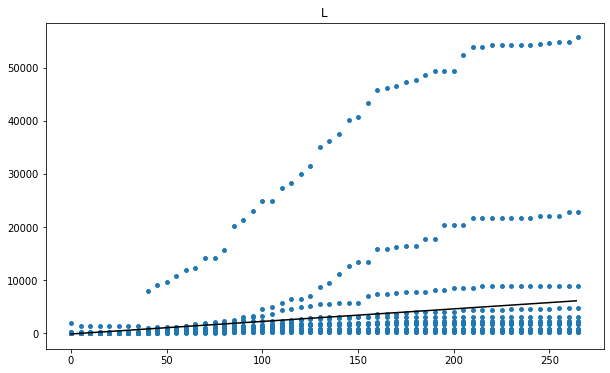

In [102]:
import matplotlib.pyplot as plt


def plot_predictions(_ed_p, _x_test, _predictions, _parties, fs=(10,6)):
    for _i in range(0, len(_ed_p)):
        plt.figure(figsize=fs)
        plt.scatter(_ed_p[_i]['TimeElapsed'], _ed_p[_i]['Votes'], s=15)
        plt.plot(_x_test, _predictions[_i], color='k')
        plt.title(_parties[_i])
        plt.show()


plot_predictions(ed_p, X_test, predictions, parties)

In [103]:
del X_test

### ?

In [ ]:
# del ed_p
# del parties
# del predictions

